In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [10]:
iris=pd.read_csv('/content/sample_data/IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
iris.shape


(150, 5)

In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
iris.columns=[col.strip() for col in iris.columns]
iris.dropna(inplace=True)
iris.reset_index(drop=True,inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Splitting the data

In [16]:
X = iris.iloc[:, :-2]
y = iris["species"]
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.33,
                                       random_state=42)

To import Kmeans

In [13]:
from sklearn.cluster import KMeans

In [18]:
wcss = []

for i in range(1, 11):
	kmeans = KMeans(n_clusters=i,
					init='k-means++',
					max_iter=300,
					n_init=10,
					random_state=0)
	kmeans.fit(X)
	wcss.append(kmeans.inertia_)

# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=3,
				init='k-means++',
				max_iter=300,
				n_init=10,
				random_state=0)
y_kmeans = kmeans.fit_predict(X)


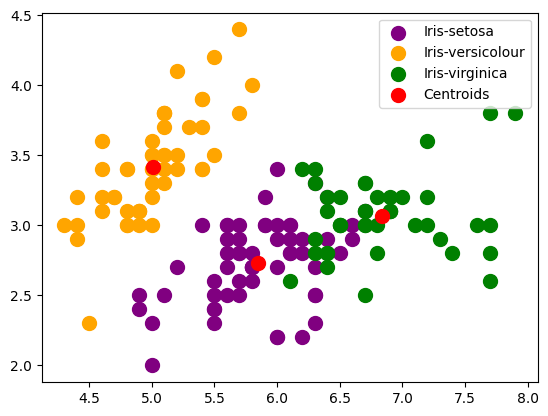

In [19]:
# Visualising the clusters
cols = iris.columns
plt.scatter(X.loc[y_kmeans == 0, cols[0]],
			X.loc[y_kmeans == 0, cols[1]],
			s=100, c='purple',
			label='Iris-setosa')
plt.scatter(X.loc[y_kmeans == 1, cols[0]],
			X.loc[y_kmeans == 1, cols[1]],
			s=100, c='orange',
			label='Iris-versicolour')
plt.scatter(X.loc[y_kmeans == 2, cols[0]],
			X.loc[y_kmeans == 2, cols[1]],
			s=100, c='green',
			label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
			kmeans.cluster_centers_[:, 1],
			s=100, c='red',
			label='Centroids')

plt.legend()
